# 01. 탐색적 데이터 분석

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv("data/train_df_jm.csv")
test = pd.read_csv("data/test_df_jm.csv")
sub = pd.read_csv("data/sample_submission.csv")
age = pd.read_csv("data/age_gender_info.csv")

train.shape, test.shape, sub.shape, age.shape

((2869, 15), (1008, 14), (150, 2), (16, 23))

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2869 entries, 0 to 2868
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2869 non-null   object 
 1   총세대수                          2869 non-null   int64  
 2   임대건물구분                        2869 non-null   object 
 3   지역                            2869 non-null   object 
 4   공급유형                          2869 non-null   object 
 5   전용면적                          2869 non-null   float64
 6   전용면적별세대수                      2869 non-null   int64  
 7   공가수                           2869 non-null   float64
 8   자격유형                          2869 non-null   object 
 9   임대보증금                         2300 non-null   object 
 10  임대료                           2300 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2662 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2869 non-null   float64
 13  단지내

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          1008 non-null   object 
 1   총세대수                          1008 non-null   int64  
 2   임대건물구분                        1008 non-null   object 
 3   지역                            1008 non-null   object 
 4   공급유형                          1008 non-null   object 
 5   전용면적                          1008 non-null   float64
 6   전용면적별세대수                      1008 non-null   int64  
 7   공가수                           1008 non-null   float64
 8   자격유형                          1006 non-null   object 
 9   임대보증금                         828 non-null    object 
 10  임대료                           828 non-null    object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  970 non-null    float64
 12  도보 10분거리 내 버스정류장 수            1008 non-null   float64
 13  단지내

### train set, test set column 비교
* '등록차량수' 컬럼을 제외하고는 train set, test set의 column은 같다

In [4]:
train.columns, test.columns

(Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
        '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
        '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
       dtype='object'),
 Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
        '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
        '도보 10분거리 내 버스정류장 수', '단지내주차면수'],
       dtype='object'))

* 컬럼명 변경

In [6]:
train.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철수',
       '버정수', '단지내주차면수', '등록차량수']

test.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철수',
       '버정수', '단지내주차면수']

In [6]:
train.head(20)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철수,버정수,단지내주차면수,등록차량수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,205.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0,205.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0,205.0
5,C2515,545,아파트,경상남도,국민임대,51.97,106,17.0,A,23042000,190090,0.0,3.0,624.0,205.0
6,C2515,545,아파트,경상남도,국민임대,51.97,26,17.0,A,23042000,190090,0.0,3.0,624.0,205.0
7,C1407,1216,아파트,대전광역시,국민임대,30.95,288,13.0,A,15620000,127350,1.0,1.0,1285.0,1064.0
8,C1407,1216,아파트,대전광역시,국민임대,30.99,68,13.0,A,15620000,127350,1.0,1.0,1285.0,1064.0
9,C1407,1216,아파트,대전광역시,국민임대,30.99,34,13.0,A,15620000,127350,1.0,1.0,1285.0,1064.0


In [7]:
train.loc[train['버정수'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철수,버정수,단지내주차면수,등록차량수


In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
총세대수,2869.0,887.654235,517.795084,26.00,514.0,775.00,1105.00,2568.0
전용면적,2869.0,44.421394,32.072217,12.62,32.1,39.84,51.05,583.4
전용면적별세대수,2869.0,102.699895,133.287517,1.00,14.0,60.00,142.00,1865.0
공가수,2869.0,12.915999,10.679931,0.00,4.0,11.00,20.00,55.0
지하철수,2662.0,0.181818,0.432606,0.00,0.0,0.00,0.00,3.0
버정수,2869.0,3.709655,2.676486,0.00,2.0,3.00,4.00,20.0
단지내주차면수,2869.0,591.934472,391.292702,13.00,277.0,500.00,812.00,1798.0
등록차량수,2869.0,550.127571,430.465261,13.00,209.0,479.00,761.00,2550.0


In [9]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
총세대수,1008.0,869.378968,535.908018,75.00,492.50,754.00,1161.00,2572.0
전용면적,1008.0,43.788462,36.105647,9.96,33.15,39.72,47.41,583.4
전용면적별세대수,1008.0,101.093254,126.674450,1.00,14.00,60.00,140.00,1341.0
공가수,1008.0,15.630952,11.116013,0.00,6.00,16.00,23.00,45.0
지하철수,970.0,0.138144,0.437519,0.00,0.00,0.00,0.00,2.0
버정수,1008.0,4.597222,5.391566,1.00,2.00,3.00,5.00,50.0
단지내주차면수,1008.0,546.678571,341.278739,29.00,286.00,458.00,706.50,1696.0


In [10]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

## 결측치 처리
* train :  임대보증금 , 임대료, 도보 10분거리 내 지하철역 수(환승노선 수 반영), 도보 10분거리 내 버스정류장 수 
* test : 자격유형, 임대보증금, 임대료, 임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영)

* train + test
    * 자격유형 :2
    * 임대보증금 :749
    * 임대료 :749
    * 도보 10분거리 내 지하철역 수(환승노선 수 반영):253
    * 도보 10분거리 내 버스정류장 수:4

In [91]:
all_df = pd.concat([train, test], join='inner')
all_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철수,버정수,단지내주차면수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0
5,C2515,545,아파트,경상남도,국민임대,51.97,106,17.0,A,23042000,190090,0.0,3.0,624.0
6,C2515,545,아파트,경상남도,국민임대,51.97,26,17.0,A,23042000,190090,0.0,3.0,624.0
7,C1407,1216,아파트,대전광역시,국민임대,30.95,288,13.0,A,15620000,127350,1.0,1.0,1285.0
8,C1407,1216,아파트,대전광역시,국민임대,30.99,68,13.0,A,15620000,127350,1.0,1.0,1285.0
9,C1407,1216,아파트,대전광역시,국민임대,30.99,34,13.0,A,15620000,127350,1.0,1.0,1285.0


### 1) 결측치처리 : 자격유형 

In [92]:
all_df.loc[all_df['자격유형'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철수,버정수,단지내주차면수
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0


In [93]:
grouped = all_df.groupby(['단지코드', '임대건물구분', '지역','공급유형'])
group1 = grouped.get_group( ('C2411', '아파트', '경상남도', '국민임대')  )
group1

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철수,버정수,단지내주차면수
193,C2411,962,아파트,경상남도,국민임대,39.43,56,25.0,A,11992000,100720,0.0,2.0,840.0
194,C2411,962,아파트,경상남도,국민임대,39.72,336,25.0,A,11992000,100720,0.0,2.0,840.0
195,C2411,962,아파트,경상남도,국민임대,39.82,179,25.0,A,11992000,100720,0.0,2.0,840.0
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0
197,C2411,962,아파트,경상남도,국민임대,51.93,150,25.0,A,21586000,171480,0.0,2.0,840.0


In [94]:
group2 = grouped.get_group( ('C2253', '아파트', '강원도', '영구임대')  )
group2

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철수,버정수,단지내주차면수
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0
259,C2253,1161,아파트,강원도,영구임대,31.32,239,0.0,C,3731000,83020,0.0,2.0,173.0
260,C2253,1161,아파트,강원도,영구임대,31.32,149,0.0,C,3731000,83020,0.0,2.0,173.0


In [95]:
all_df.loc[ 196, "자격유형"] = 'A'
all_df.loc[ 258, "자격유형"] = 'C'


### 2) 결측치처리 : 임대보증금

In [96]:
print(all_df[all_df['임대보증금']=='-'].shape)
# - 값 0으로 바꾸기
all_df.loc[all_df['임대보증금']=='-','임대보증금'] = 0
print('변경후')
print(all_df[all_df['임대보증금']=='-'].shape)


(18, 14)
변경후
(0, 14)


In [97]:
#일단 Nan 0으로 처리
print(all_df['임대보증금'].isnull().sum())
all_df['임대보증금'] = all_df['임대보증금'].fillna(0)
print('변경후')
print(all_df['임대보증금'].isnull().sum())

749
변경후
0


### 3) 결측치처리 : 임대료

In [98]:
print(all_df[all_df['임대료']=='-'].shape)
# - 값 0으로 바꾸기
all_df.loc[all_df['임대료']=='-','임대료'] = 0
print('변경후')
print(all_df[all_df['임대료']=='-'].shape)


(21, 14)
변경후
(0, 14)


In [99]:
#일단 Nan 0으로 처리
print(all_df['임대료'].isnull().sum())
all_df['임대료'] = all_df['임대료'].fillna(0)
print('변경후')
print(all_df['임대료'].isnull().sum())

749
변경후
0


In [100]:
all_df['임대료'] = all_df['임대료'].astype(int)
all_df['임대보증금'] = all_df['임대보증금'].astype(int)

In [101]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3877 entries, 0 to 1007
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      3877 non-null   object 
 1   총세대수      3877 non-null   int64  
 2   임대건물구분    3877 non-null   object 
 3   지역        3877 non-null   object 
 4   공급유형      3877 non-null   object 
 5   전용면적      3877 non-null   float64
 6   전용면적별세대수  3877 non-null   int64  
 7   공가수       3877 non-null   float64
 8   자격유형      3877 non-null   object 
 9   임대보증금     3877 non-null   int32  
 10  임대료       3877 non-null   int32  
 11  지하철수      3632 non-null   float64
 12  버정수       3877 non-null   float64
 13  단지내주차면수   3877 non-null   float64
dtypes: float64(5), int32(2), int64(2), object(5)
memory usage: 504.0+ KB


###  4) 결측치처리 : 10분내지하철수 

* 환산보증금 계산하여 환산보증금 기준으로 비슷한 정보의 10분내 지하철수와 버스정류장수 생각해보자 (일단 보류.....)

In [102]:
all_df['환산보증금'] = all_df['임대보증금'].astype(int)+(all_df['임대료'].astype(int)+100)
all_df['환산보증금']

0        9299040
1       12779230
2       12779230
3       18582860
4       18582860
5       23232190
6       23232190
7       15747450
8       15747450
9       15747450
10      27801710
11      27801710
12      27801710
13      27801710
14      36246350
15      36246350
16      42309620
17      42309620
18      15737170
19      15737170
20      23332330
21      23332330
22      29453120
23      29453120
24      12117230
25      12117230
26      21760260
27      25377280
28      12117230
29      12117230
30      12117230
31      21760260
32      21760260
33      25377280
34      29754130
35      29754130
36      29754130
37      29754130
38      44294640
39      44294640
40      44294640
41      44294640
42      44294640
43      44294640
44      50192480
45      50192480
46      50192480
47      17848290
48      23782940
49      23782940
          ...   
958     25760100
959     25760100
960     25760100
961     25760100
962     25760100
963     25760100
964     25760100
965     257601

In [103]:
#일단 Nan 0으로 처리
print(all_df['지하철수'].isnull().sum())
all_df['지하철수'] = all_df['지하철수'].fillna(0)
print('변경후')
print(all_df['지하철수'].isnull().sum())

245
변경후
0


In [104]:
# 모든 행을 표시하려면 max_rows를 DataFrame의 행 수보다 크게 설정하십시오.
# 데이터 프레임이 잘릴 때 10 개가 넘는 행을 표시하려면 min_rows를 10보다 크게 설정하십시오.
pd.set_option("display.max_rows", 100)
pd.get_option("display.max_rows")
pd.set_option("display.min_rows", 100)
pd.get_option("display.min_rows")

100

In [105]:
# 결측치 처리 확인 
all_df.isnull().sum().to_frame()

,0
단지코드,0
총세대수,0
임대건물구분,0
지역,0
공급유형,0
전용면적,0
전용면적별세대수,0
공가수,0
자격유형,0
임대보증금,0


## 라벨인코딩

#### 1) 자격유형

In [106]:
# print(all_df.자격유형.unique())
all_df['자격유형'].isnull().sum()

0

In [107]:
all_df['자격유형'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O'], dtype=object)

In [108]:
mapping = { 'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 
            'F':6, 'G':7, 'H':8, 'I':9, 'J':10, 
            'K':11, 'L':12, 'M':13, 'N':14, 'O':15  }

all_df['자격유형'] =all_df['자격유형'].map(mapping)

In [109]:
for c in all_df.columns:
    print(all_df[c].unique())

['C2515' 'C1407' 'C1945' 'C1470' 'C1898' 'C1244' 'C1171' 'C2073' 'C2513'
 'C1936' 'C2049' 'C2202' 'C1925' 'C2576' 'C1312' 'C1874' 'C2650' 'C2416'
 'C2013' 'C1424' 'C2100' 'C2621' 'C2520' 'C2319' 'C1616' 'C1704' 'C2258'
 'C1032' 'C2038' 'C1859' 'C1722' 'C1850' 'C2190' 'C1476' 'C1077' 'C1068'
 'C1983' 'C2135' 'C2034' 'C1109' 'C1497' 'C2289' 'C2597' 'C2310' 'C1672'
 'C2132' 'C1439' 'C1613' 'C2216' 'C1899' 'C1056' 'C2644' 'C1206' 'C2481'
 'C1718' 'C1655' 'C1430' 'C1775' 'C1519' 'C2221' 'C1790' 'C2109' 'C1698'
 'C1866' 'C1005' 'C1004' 'C1875' 'C2156' 'C2212' 'C2401' 'C2571' 'C1175'
 'C1833' 'C2445' 'C1885' 'C2368' 'C2016' 'C2371' 'C2536' 'C2538' 'C1014'
 'C1592' 'C1867' 'C2326' 'C1015' 'C1620' 'C1049' 'C2000' 'C2097' 'C1668'
 'C1689' 'C1234' 'C2514' 'C1368' 'C1057' 'C2336' 'C1026' 'C2256' 'C1900'
 'C2666' 'C2361' 'C1642' 'C1013' 'C2232' 'C1973' 'C2458' 'C2574' 'C2133'
 'C2096' 'C2010' 'C1879' 'C1131' 'C1468' 'C1213' 'C1173' 'C2492' 'C2032'
 'C2094' 'C1880' 'C2089' 'C1744' 'C2046' 'C2071' 'C

#### 2) 지역

In [110]:
map_region = {'경상북도':1, '경상남도':2, '대전광역시':3, '경기도':4, '전라북도':5,
              '강원도':6, '광주광역시':7, '충청남도':8, '부산광역시':9, '제주특별자치도':10,
            '울산광역시':11, '충청북도':12, '전라남도':13, '대구광역시':14, '서울특별시':15, '세종특별자치시':16}

all_df["지역"] = all_df['지역'].map(map_region).astype(int)

#### 3) 임대건물구분

In [111]:
map_type = {'아파트':1, '상가':2}

all_df['임대건물구분'] = all_df['임대건물구분'].map(map_type)

#### 4) 공급유형

In [112]:
map_supply_type = {'국민임대':1, '공공임대(50년)':2, '영구임대':3, '임대상가':4, '공공임대(10년)':5,
              '공공임대(분납)':6, '장기전세':7, '공공분양':8, '행복주택':9, '공공임대(5년)':10}
all_df["공급유형"] = all_df['공급유형'].map(map_supply_type).astype(int)

In [113]:
all_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철수,버정수,단지내주차면수,환산보증금
0,C2515,545,1,2,1,33.48,276,17.0,1,9216000,82940,0.0,3.0,624.0,9299040
1,C2515,545,1,2,1,39.60,60,17.0,1,12672000,107130,0.0,3.0,624.0,12779230
2,C2515,545,1,2,1,39.60,20,17.0,1,12672000,107130,0.0,3.0,624.0,12779230
3,C2515,545,1,2,1,46.90,38,17.0,1,18433000,149760,0.0,3.0,624.0,18582860
4,C2515,545,1,2,1,46.90,19,17.0,1,18433000,149760,0.0,3.0,624.0,18582860
5,C2515,545,1,2,1,51.97,106,17.0,1,23042000,190090,0.0,3.0,624.0,23232190
6,C2515,545,1,2,1,51.97,26,17.0,1,23042000,190090,0.0,3.0,624.0,23232190
7,C1407,1216,1,3,1,30.95,288,13.0,1,15620000,127350,1.0,1.0,1285.0,15747450
8,C1407,1216,1,3,1,30.99,68,13.0,1,15620000,127350,1.0,1.0,1285.0,15747450
9,C1407,1216,1,3,1,30.99,34,13.0,1,15620000,127350,1.0,1.0,1285.0,15747450


In [114]:
train.shape, test.shape

((2869, 15), (1008, 14))

In [127]:
train_df = all_df.iloc[0:2869,:]
test_df = all_df.iloc[2869:,:]

train_df.shape, test_df.shape
train_df = pd.concat([train_df, train['등록차량수'] ], axis=1)

In [128]:
train_df.loc[train_df['지역'] == 15].shape

(50, 16)

In [129]:
train_df = train_df.loc[~(train_df['지역'] == 15),:]
train_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철수,버정수,단지내주차면수,환산보증금,등록차량수
0,C2515,545,1,2,1,33.48,276,17.0,1,9216000,82940,0.0,3.0,624.0,9299040,205.0
1,C2515,545,1,2,1,39.60,60,17.0,1,12672000,107130,0.0,3.0,624.0,12779230,205.0
2,C2515,545,1,2,1,39.60,20,17.0,1,12672000,107130,0.0,3.0,624.0,12779230,205.0
3,C2515,545,1,2,1,46.90,38,17.0,1,18433000,149760,0.0,3.0,624.0,18582860,205.0
4,C2515,545,1,2,1,46.90,19,17.0,1,18433000,149760,0.0,3.0,624.0,18582860,205.0
5,C2515,545,1,2,1,51.97,106,17.0,1,23042000,190090,0.0,3.0,624.0,23232190,205.0
6,C2515,545,1,2,1,51.97,26,17.0,1,23042000,190090,0.0,3.0,624.0,23232190,205.0
7,C1407,1216,1,3,1,30.95,288,13.0,1,15620000,127350,1.0,1.0,1285.0,15747450,1064.0
8,C1407,1216,1,3,1,30.99,68,13.0,1,15620000,127350,1.0,1.0,1285.0,15747450,1064.0
9,C1407,1216,1,3,1,30.99,34,13.0,1,15620000,127350,1.0,1.0,1285.0,15747450,1064.0


In [130]:
train_df.loc[train_df['지역'] == 15].shape

(0, 16)

In [131]:
# sns.pairplot(train_df, hue = '등록차량수')

In [132]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# 앙상블 기법
from sklearn.ensemble import RandomForestRegressor

## 그래디언트 부스팅 모델
import xgboost as xgb
import lightgbm as lgb
import numpy as np
import time

In [133]:
train_df.corr()['등록차량수']

총세대수        0.328708
임대건물구분     -0.448526
지역          0.002047
공급유형       -0.164294
전용면적        0.104010
전용면적별세대수    0.258486
공가수         0.136273
자격유형       -0.145359
임대보증금       0.456181
임대료         0.555053
지하철수       -0.077386
버정수         0.113298
단지내주차면수     0.856292
환산보증금       0.457954
등록차량수       1.000000
Name: 등록차량수, dtype: float64

<AxesSubplot:>

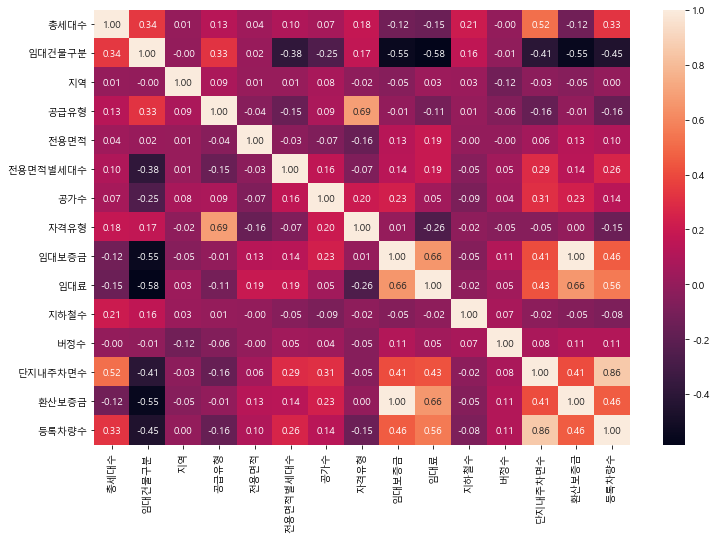

In [122]:
plt.figure(figsize=(12,8))
sns.heatmap(train_df.corr(), annot=True, fmt=".2f")

In [123]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split

sel = ['총세대수', '전용면적', '전용면적별세대수','임대건물구분','지역','공급유형', '공가수','지하철수','자격유형', '버정수', 
       '임대보증금','임대료','단지내주차면수']

X = train_df[sel]
y = train_df['등록차량수']
test_X = test_df[sel]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.1, 
                                                    random_state=0)
print(X_test)

      총세대수   전용면적  전용면적별세대수  임대건물구분  지역  공급유형   공가수  지하철수  자격유형   버정수  \
2457  1058  51.72        19       1   4     1  16.0   0.0     8   4.0   
333    453  32.10         1       2   2     4   6.0   0.0     4   5.0   
70     240  51.88        20       1   7     1   8.0   0.0     1  10.0   
569   1755  16.57         1       2   9     4  29.0   1.0     4   3.0   
118    619  55.17         1       2   8     4   2.0   0.0     4   2.0   
124    560  30.48       192       1   2     3   0.0   0.0     3   5.0   
1437   531  46.90        27       1  13     1   7.0   0.0     1   2.0   
1733   747  39.72        67       1   6     1  13.0   0.0     1   2.0   
2329   268  29.81        12       1  12     1   4.0   0.0     1   5.0   
923    961  36.66        56       1   9     1  28.0   0.0     1   3.0   
2453  1058  24.76       186       1   4     1  16.0   0.0     8   4.0   
2017  1006  59.88        60       1   1     1  33.0   0.0     1   3.0   
1966   107  51.73        11       1   8     1   7.0

In [124]:


hyperparameters = {'boosting_type': 'gbdt', 
                   'colsample_bytree': 0.7250136792694301, 
                   'is_unbalance': False, 
                   'learning_rate': 0.013227664889528229,
                   'min_child_samples': 20, 
                   'num_leaves': 56, 
                   'reg_alpha': 0.7543896477745794, 
                   'reg_lambda': 0.07152751159655985, 
                   'subsample_for_bin': 240000, 
                   'subsample': 0.5233384321711397, 
                   'n_estimators': 1093}

In [125]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2537 entries, 2563 to 2782
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   총세대수      2537 non-null   int64  
 1   전용면적      2537 non-null   float64
 2   전용면적별세대수  2537 non-null   int64  
 3   임대건물구분    2537 non-null   int64  
 4   지역        2537 non-null   int32  
 5   공급유형      2537 non-null   int32  
 6   공가수       2537 non-null   float64
 7   지하철수      2537 non-null   float64
 8   자격유형      2537 non-null   int64  
 9   버정수       2537 non-null   float64
 10  임대보증금     2537 non-null   int32  
 11  임대료       2537 non-null   int32  
 12  단지내주차면수   2537 non-null   float64
dtypes: float64(5), int32(4), int64(4)
memory usage: 237.8 KB
None


In [142]:
# 최종 모델 선택 및 제출
m_lgbm2 = lgb.LGBMRegressor(**hyperparameters)
m_lgbm2.fit(X, y)



LGBMRegressor(colsample_bytree=0.7250136792694301, is_unbalance=False,
              learning_rate=0.013227664889528229, n_estimators=1093,
              num_leaves=56, reg_alpha=0.7543896477745794,
              reg_lambda=0.07152751159655985, subsample=0.5233384321711397,
              subsample_for_bin=240000)

In [148]:
pred = m_lgbm2.predict(test_X)
print(pred.shape)
test['등록차량수']=pred
test['단지별차량수평균']=test.groupby('단지코드')['등록차량수'].transform(np.mean)

# test 1022개의 단지코드 중복을 빼주기 그리고 가장 첫번째 값만 남기기
test_new = test.drop_duplicates(['단지코드'],keep='first').reset_index()
# 결론적으로 150개만 남음.

#150개 코드별 차량수 평균을 sub_df로 만든다.
sub_df = test_new[['단지코드','단지별차량수평균']]

#컬럼명을 일치시킨다.
sub_df.columns =['code','num']

# 없는 컬럼 채워넣기
sub_df = sub_df.append({'code':'C2675','num': 0}, ignore_index=True)
sub_df = sub_df.append({'code':'C2335','num': 0}, ignore_index=True)
sub_df = sub_df.append({'code':'C1327','num': 0}, ignore_index=True)


sub_df.to_csv('6th_lgbm_0720.csv',index=False)

ValueError: Number of features of the model must match the input. Model n_features_ is 13 and input n_features is 14 

#### train에서 서울 빼기 전 lasso
* 학습(score) : 0.7979573644269766
* 테스트(score) : 0.7897606838708565

#### train에서 서울 뺀 후 lasso
* 학습(score) : 0.800146365082473
* 테스트(score) : 0.8113974430726985

## 점수 : 115.32019 , Ranking : 238

## 서울 빼고 baseline 수정한 결과